## A first neural network in Keras

### General imports

In [1]:
% matplotlib inline
import pickle
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import os

### First step is to load data from file and plot a few examples

In [2]:
train_x = pickle.load(open("MNIST_train_x.pkl", 'rb'))
train_y = pickle.load(open("MNIST_train_y.pkl", 'rb'))
test_x = pickle.load(open("MNIST_test_x.pkl", 'rb'))
test_y = pickle.load(open("MNIST_test_y.pkl", 'rb'))
print("Data stats")
print(type(train_x))
print(train_x.shape)
print(type(train_y))
print(train_y.shape)
print(type(test_x))
print(test_x.shape)
print(type(test_y))
print(test_y.shape)

# Creating subset of training data to speed up training
train_x_short = train_x[:20000]
train_y_short = train_y[:20000]
print("Short training data size")
print(train_x_short.shape)
print(train_y_short.shape)

Data stats
<class 'numpy.ndarray'>
(60000, 784)
<class 'numpy.ndarray'>
(60000, 10)
<class 'numpy.ndarray'>
(10000, 784)
<class 'numpy.ndarray'>
(10000, 10)
Short training data size
(20000, 784)
(20000, 10)


In [3]:
def plotExamples(data, labels):
    plt.figure(figsize=(8,5))
    for i in range(8):
        sub = 241 + i
        ax = plt.subplot(sub)
        index = np.random.randint(0, data.shape[0])
        ax.set_title("num: " + str(np.argmax(labels[index])))
        im = np.reshape(data[index], (28, 28))
        plt.imshow(im, cmap="gray")
    plt.show()

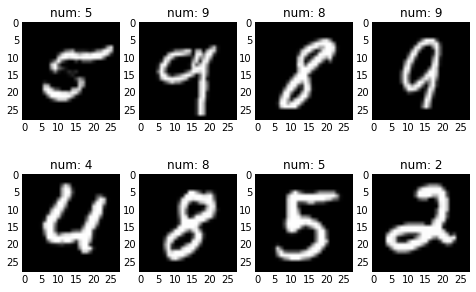

In [4]:
plotExamples(train_x, train_y)

### Building a first Keras model
- Simple 3 layer feedforward network
- Three steps: 
    - Build model
    - Compile model setting the optimizer and loss 
        - Note models can be recompiled without affecting the stored value of weights and biases. This means that if you want to change your learning rate or optimizer during training, you simply recompile and call model.fit again
    - Train the model by calling model.fit

In [5]:
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.optimizers import SGD

Using TensorFlow backend.


In [6]:
'''
First step is to initialize your model
Keras has two types of models 
    1. Sequential - easier to work with, suitable for most tasks
    2. Functional API - useful for defining complex models
'''
model = Sequential()

'''Then, define your model architecture'''

'''
Add a fully connected hidden layer with 128 nodes. 
When you add your first layer, Keras implicitly adds the input layer, 
so you need to specify the dimension of your inputs
'''
model.add(Dense(128, input_dim=784))
'''Specify your activation function for this layer'''
model.add(Activation('sigmoid'))
'''Add an output layer with 10 output nodes'''
model.add(Dense(10))
'''Specify your activation function for this layer'''
model.add(Activation('sigmoid'))

'''
Next, compile your model. This defines two critical features
    1. Optimizer - how your model learns
    2. Loss function - how your model defines the error between
       the correct output and its prediction
Here you can also specify the metrics you want to use to evaluate your model's performance
'''
sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])

'''
Finally, train your model. 
To train, a model needs input data, and the corresponding correct outputs
You can also specify the batch size and number of training epochs
'''
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2)

Epoch 1/10
2s - loss: 0.1106 - acc: 0.2424
Epoch 2/10
1s - loss: 0.0790 - acc: 0.4164
Epoch 3/10
2s - loss: 0.0720 - acc: 0.5197
Epoch 4/10
2s - loss: 0.0664 - acc: 0.5906
Epoch 5/10
2s - loss: 0.0617 - acc: 0.6431
Epoch 6/10
1s - loss: 0.0577 - acc: 0.6930
Epoch 7/10
1s - loss: 0.0541 - acc: 0.7275
Epoch 8/10
1s - loss: 0.0511 - acc: 0.7541
Epoch 9/10
2s - loss: 0.0485 - acc: 0.7772
Epoch 10/10
2s - loss: 0.0462 - acc: 0.7946


In [7]:
# Print model information
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_1 (Dense)                  (None, 128)           100480      dense_input_1[0][0]              
____________________________________________________________________________________________________
activation_1 (Activation)        (None, 128)           0           dense_1[0][0]                    
____________________________________________________________________________________________________
dense_2 (Dense)                  (None, 10)            1290        activation_1[0][0]               
____________________________________________________________________________________________________
activation_2 (Activation)        (None, 10)            0           dense_2[0][0]                    
Total params: 101770
______________________________________________________________________

### Example of recompiling a model
 - This allows you to change the settings of the optimizer and loss function if you wish, without affecting the values of the weights and biases
 - It can be useful for reducing the learning rate if your model performance has plateaued
 - This example also illustrates the validation_split option of the fit function. It holds out a specified proportion of your training data for evaluating model performance as it trains. 
     - This enables you to tune your hyperparameters and model architecture without polluting the test data

In [8]:
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))

sgd = SGD(lr=0.1)
print("Learning rate is 0.1")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)
print()
sgd = SGD(lr=0.01)
print("Learning rate is 0.01")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)
print()
sgd = SGD(lr=0.001)
print("Learning rate is 0.001")
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, verbose=2, validation_split=0.2)

Learning rate is 0.1
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
1s - loss: 0.0758 - acc: 0.4849 - val_loss: 0.0574 - val_acc: 0.6860
Epoch 2/10
1s - loss: 0.0480 - acc: 0.7692 - val_loss: 0.0424 - val_acc: 0.8037
Epoch 3/10
1s - loss: 0.0372 - acc: 0.8366 - val_loss: 0.0348 - val_acc: 0.8440
Epoch 4/10
2s - loss: 0.0310 - acc: 0.8654 - val_loss: 0.0299 - val_acc: 0.8692
Epoch 5/10
2s - loss: 0.0271 - acc: 0.8793 - val_loss: 0.0266 - val_acc: 0.8788
Epoch 6/10
2s - loss: 0.0245 - acc: 0.8894 - val_loss: 0.0243 - val_acc: 0.8890
Epoch 7/10
2s - loss: 0.0227 - acc: 0.8961 - val_loss: 0.0226 - val_acc: 0.8912
Epoch 8/10
1s - loss: 0.0209 - acc: 0.9027 - val_loss: 0.0218 - val_acc: 0.8952
Epoch 9/10
1s - loss: 0.0198 - acc: 0.9089 - val_loss: 0.0203 - val_acc: 0.9015
Epoch 10/10
2s - loss: 0.0187 - acc: 0.9116 - val_loss: 0.0196 - val_acc: 0.9032

Learning rate is 0.01
Train on 16000 samples, validate on 4000 samples
Epoch 1/10
2s - loss: 0.0177 - acc: 0.9167 - val_loss: 0.

### Helper function to calculate model accuracy on the test data

In [9]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    num_correct = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    accuracy = np.sum(num_correct) / result.shape[0]
    print("Accuracy on data is: {}%".format(accuracy * 100))

In [10]:
accuracy(test_x, test_y, model)

Accuracy on data is: 91.08000000000001%


### Plotting some examples the model got right and wrong

In [11]:
def get_correct_and_incorrect(model, test_x, test_y):
    result = model.predict(test_x)
    correct_indices = np.argmax(result, axis=1)==np.argmax(test_y, axis=1)
    test_x_correct = test_x[correct_indices]
    test_y_correct = test_y[correct_indices]
    incorrect_indices = np.argmax(result, axis=1)!=np.argmax(test_y, axis=1)
    test_x_incorrect = test_x[incorrect_indices]
    test_y_incorrect = test_y[incorrect_indices]
    return test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect

In [12]:
test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect = get_correct_and_incorrect(model, test_x, test_y)

(9108, 784)


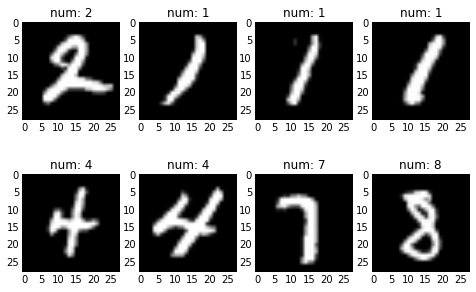

In [13]:
print(test_x_correct.shape)
plotExamples(test_x_correct, test_y_correct)

(892, 784)


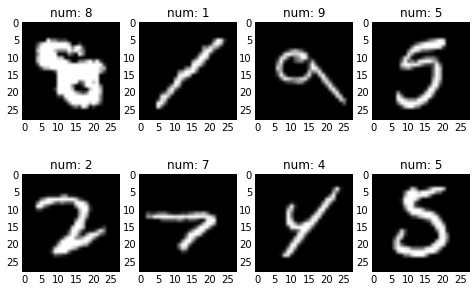

In [14]:
print(test_x_incorrect.shape)
plotExamples(test_x_incorrect, test_y_incorrect)

### Quadratic cost (mean squared error) vs. categorical crossentropy loss functions
- Categorical cross-entropy significantly speeds up training
- Softmax output layers are the most appropriate for the MNIST problem since each image can only belong to one class and softmax outputs a proability distribution across the 10 classes.
    - As the value of one output node increases, the value of one or more other output nodes must decrease
    - This is consistent with our intuition that as we become more confident and image belongs to one class, we reduce our confidence that an image belongs to other classes

In [15]:
# Softmax output layer, mse
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)
print()

# Softmax output layer, categorical crossentropy
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
2s - loss: 0.0901 - acc: 0.1930 - val_loss: 0.0845 - val_acc: 0.2825
Epoch 2/10
1s - loss: 0.0798 - acc: 0.3456 - val_loss: 0.0762 - val_acc: 0.3965
Epoch 3/10
1s - loss: 0.0722 - acc: 0.4629 - val_loss: 0.0697 - val_acc: 0.4940
Epoch 4/10
1s - loss: 0.0657 - acc: 0.5453 - val_loss: 0.0641 - val_acc: 0.5563
Epoch 5/10
1s - loss: 0.0602 - acc: 0.6014 - val_loss: 0.0592 - val_acc: 0.6025
Epoch 6/10
1s - loss: 0.0554 - acc: 0.6438 - val_loss: 0.0550 - val_acc: 0.6392
Epoch 7/10
1s - loss: 0.0515 - acc: 0.6793 - val_loss: 0.0517 - val_acc: 0.6675
Epoch 8/10
1s - loss: 0.0482 - acc: 0.7089 - val_loss: 0.0488 - val_acc: 0.6917
Epoch 9/10
1s - loss: 0.0453 - acc: 0.7279 - val_loss: 0.0463 - val_acc: 0.7137
Epoch 10/10
1s - loss: 0.0428 - acc: 0.7447 - val_loss: 0.0440 - val_acc: 0.7315

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
2s - loss: 1.0656 - acc: 0.7223 - val_loss: 0.6754 - val_acc: 0.8397
Epoch 2/10
1s - loss

## ReLU vs. Sigmoid

## ReLU observations
- Needs a low learning rate for the network to learn anything
- Performs worse than a sigmoid hidden layer for shallow networks

In [16]:
# Relu hidden layer, 3 layer network
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
2s - loss: 11.1237 - acc: 0.3065 - val_loss: 9.8545 - val_acc: 0.3862
Epoch 2/10
2s - loss: 8.5737 - acc: 0.4656 - val_loss: 8.4146 - val_acc: 0.4743
Epoch 3/10
2s - loss: 8.4059 - acc: 0.4763 - val_loss: 8.3424 - val_acc: 0.4810
Epoch 4/10
2s - loss: 7.7592 - acc: 0.5151 - val_loss: 7.6560 - val_acc: 0.5212
Epoch 5/10
1s - loss: 6.8016 - acc: 0.5726 - val_loss: 5.8155 - val_acc: 0.6348
Epoch 6/10
2s - loss: 5.8799 - acc: 0.6306 - val_loss: 5.8546 - val_acc: 0.6315
Epoch 7/10
2s - loss: 5.7213 - acc: 0.6409 - val_loss: 5.4351 - val_acc: 0.6600
Epoch 8/10
2s - loss: 5.6266 - acc: 0.6480 - val_loss: 5.4991 - val_acc: 0.6558
Epoch 9/10
1s - loss: 5.5457 - acc: 0.6530 - val_loss: 5.3986 - val_acc: 0.6620
Epoch 10/10
2s - loss: 5.5269 - acc: 0.6544 - val_loss: 5.4382 - val_acc: 0.6593


In [17]:
# Sigmoid hidden layer, 3 layer network
model = Sequential()
model.add(Dense(128, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
2s - loss: 1.0800 - acc: 0.7184 - val_loss: 0.6667 - val_acc: 0.8390
Epoch 2/10
2s - loss: 0.5623 - acc: 0.8643 - val_loss: 0.5226 - val_acc: 0.8610
Epoch 3/10
1s - loss: 0.4602 - acc: 0.8833 - val_loss: 0.4372 - val_acc: 0.8880
Epoch 4/10
1s - loss: 0.4001 - acc: 0.8984 - val_loss: 0.3933 - val_acc: 0.8930
Epoch 5/10
2s - loss: 0.3600 - acc: 0.9086 - val_loss: 0.3628 - val_acc: 0.9077
Epoch 6/10
2s - loss: 0.3407 - acc: 0.9107 - val_loss: 0.3538 - val_acc: 0.9067
Epoch 7/10
2s - loss: 0.3224 - acc: 0.9152 - val_loss: 0.3309 - val_acc: 0.9113
Epoch 8/10
2s - loss: 0.3062 - acc: 0.9217 - val_loss: 0.3168 - val_acc: 0.9160
Epoch 9/10
1s - loss: 0.2901 - acc: 0.9222 - val_loss: 0.3018 - val_acc: 0.9167
Epoch 10/10
2s - loss: 0.2797 - acc: 0.9240 - val_loss: 0.3007 - val_acc: 0.9170


### Relu really comes into its own for deep networks
- Deeper network tend to perform better than shallow networks for complex tasks
- But they are hard to train. Relu's make it easier for deep networks to learn because their gradients don't saturate for postive inputs

In [18]:
# Relu hidden layer, 6 layer network
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
6s - loss: 5.8530 - acc: 0.6034 - val_loss: 1.9490 - val_acc: 0.8293
Epoch 2/10
6s - loss: 1.2457 - acc: 0.8781 - val_loss: 0.9147 - val_acc: 0.9000
Epoch 3/10
6s - loss: 0.6033 - acc: 0.9264 - val_loss: 0.5974 - val_acc: 0.9173
Epoch 4/10
5s - loss: 0.3241 - acc: 0.9501 - val_loss: 0.4812 - val_acc: 0.9245
Epoch 5/10
5s - loss: 0.1898 - acc: 0.9659 - val_loss: 0.4882 - val_acc: 0.9270
Epoch 6/10
6s - loss: 0.1207 - acc: 0.9782 - val_loss: 0.4338 - val_acc: 0.9307
Epoch 7/10
5s - loss: 0.0782 - acc: 0.9875 - val_loss: 0.4080 - val_acc: 0.9325
Epoch 8/10
6s - loss: 0.0547 - acc: 0.9937 - val_loss: 0.4024 - val_acc: 0.9353
Epoch 9/10
6s - loss: 0.0446 - acc: 0.9965 - val_loss: 0.4019 - val_acc: 0.9323
Epoch 10/10
5s - loss: 0.0413 - acc: 0.9975 - val_loss: 0.3982 - val_acc: 0.9360


In [19]:
# Sigmoid hidden layer, 6 layer network
model = Sequential()
model.add(Dense(512, input_dim=784))
model.add(Activation('sigmoid'))
model.add(Dense(256))
model.add(Activation('sigmoid'))
model.add(Dense(128))
model.add(Activation('sigmoid'))
model.add(Dense(64))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('softmax'))

sgd = SGD(lr=0.01)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x_short, train_y_short, batch_size=32, nb_epoch=10, validation_split=0.2, verbose=2)

Train on 16000 samples, validate on 4000 samples
Epoch 1/10
6s - loss: 2.2990 - acc: 0.1360 - val_loss: 2.2889 - val_acc: 0.1182
Epoch 2/10
5s - loss: 2.2823 - acc: 0.1609 - val_loss: 2.2744 - val_acc: 0.1385
Epoch 3/10
5s - loss: 2.2661 - acc: 0.2116 - val_loss: 2.2563 - val_acc: 0.1315
Epoch 4/10
6s - loss: 2.2428 - acc: 0.2767 - val_loss: 2.2270 - val_acc: 0.2632
Epoch 5/10
6s - loss: 2.2044 - acc: 0.3521 - val_loss: 2.1790 - val_acc: 0.2968
Epoch 6/10
6s - loss: 2.1371 - acc: 0.4113 - val_loss: 2.0889 - val_acc: 0.4445
Epoch 7/10
5s - loss: 2.0152 - acc: 0.4666 - val_loss: 1.9310 - val_acc: 0.5062
Epoch 8/10
5s - loss: 1.8264 - acc: 0.5063 - val_loss: 1.7185 - val_acc: 0.5075
Epoch 9/10
6s - loss: 1.6023 - acc: 0.5330 - val_loss: 1.4996 - val_acc: 0.5457
Epoch 10/10
6s - loss: 1.4030 - acc: 0.5706 - val_loss: 1.3276 - val_acc: 0.5860


### Putting everything together and training on all the data

In [20]:
# Relu hidden layer, 6 layer network
model = Sequential()
model.add(Dense(1024, input_dim=784))
model.add(Activation('relu'))
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))

model.summary()

sgd = SGD(lr=0.001)
model.compile(optimizer=sgd, loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(train_x, train_y, batch_size=32, nb_epoch=15, validation_split=0.2, verbose=2)

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
dense_23 (Dense)                 (None, 1024)          803840      dense_input_9[0][0]              
____________________________________________________________________________________________________
activation_23 (Activation)       (None, 1024)          0           dense_23[0][0]                   
____________________________________________________________________________________________________
dense_24 (Dense)                 (None, 512)           524800      activation_23[0][0]              
____________________________________________________________________________________________________
activation_24 (Activation)       (None, 512)           0           dense_24[0][0]                   
___________________________________________________________________________________________

### Model performance on the training data

In [33]:
accuracy(train_x, train_y, model)

Accuracy on data is: 99.245%


In [34]:
train_x_correct, train_y_correct, train_x_incorrect, train_y_incorrect = \
        get_correct_and_incorrect(model, train_x, train_y)

(59547, 784)


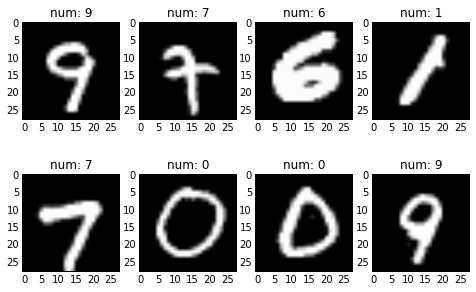

In [35]:
print(train_x_correct.shape)
plotExamples(train_x_correct, train_y_correct)

(453, 784)


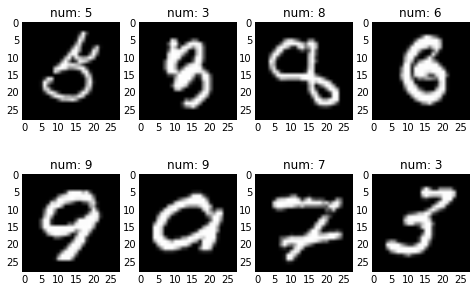

In [36]:
print(train_x_incorrect.shape)
plotExamples(train_x_incorrect, train_y_incorrect)

### Model performance on the test data

In [37]:
accuracy(test_x, test_y, model)

Accuracy on data is: 96.66%


In [38]:
test_x_correct, test_y_correct, test_x_incorrect, test_y_incorrect = get_correct_and_incorrect(model, test_x, test_y)

(9666, 784)


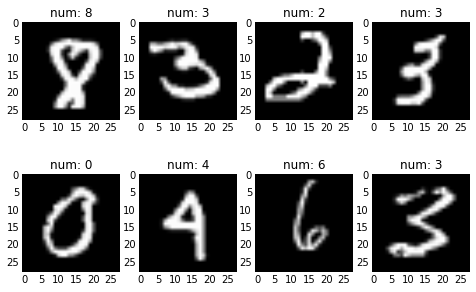

In [39]:
print(test_x_correct.shape)
plotExamples(test_x_correct, test_y_correct)

(334, 784)


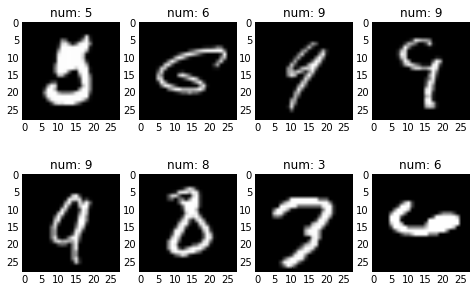

In [40]:
print(test_x_incorrect.shape)
plotExamples(test_x_incorrect, test_y_incorrect)